In [1]:
#**********load data into system***********#

import numpy as np
import string
import matplotlib as mpl
import pandas as pd
import sklearn.manifold as skmf

data=pd.read_csv("AI Classification Data Formatted.csv", header=0)#load student written SOAP notes
abbrevdata=pd.read_csv("Acronyms and Abbreviations.csv", header=0)#load approved acronyms and abbreviations

abbrevdata=abbrevdata.iloc[:,[0,1]] #include only abbreviation and meaning
abbrevdata['Abbreviation']=abbrevdata['Abbreviation'].str.lower()#de-capitalize all text data

ksim=pd.read_csv("keyword smilarity.csv", header=0)
mydata=data #create copy of dataframe in case standardization distorts results
data

,Organization Unit,ID,Case/Scenario Name,NYHA Classification,Assessment,Classification,HPI
0,Auburn,Student.177,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,0,Pt states that 3 days ago she went to her fami...
1,Auburn,Student.178,Acute Viral Myocarditis I51.4,NYHA II,1,0,The patient is a 62 y/o male who presents to t...
2,Auburn,Student.179,Acute Viral Myocarditis I51.4,NYHA II,1,1,"CC: Patient presents with shortness of breath,..."
3,Auburn,Student.180,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1,0,CC:I am short of breath when I walk around.\n\...
4,Auburn,Student.181,Acute Viral Myocarditis I51.4,NYHA II,1,1,CC: The patient is short of breath and fatigue...
...,...,...,...,...,...,...,...
644,Virginia,Student.95,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,"CC - L Palmer 62 presented with ""i feel like ..."
645,Virginia,Student.96,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,Mr. Palmer present todays with SOB 2 weeks ago...
646,Virginia,Student.97,Ischemic Cardiomyopathy I25.2,NYHA IV,1,1,62 year old male Mr. Palmer comes into the off...
647,Virginia,Student.98,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1,1,A 62 year old female presents to the office wi...


In [221]:
ksim

,sob,weeks,two,some,activity,most,any,rest,comfortable,flutter,...,gym,swelling,marked,unable,increased,no sob,two weeks,pass out,six months,two months
0,shortness,NaN,2.0,slight,physical activity,NaN,NaN,NaN,NaN,palpitations,...,NaN,NaN,NaN,NaN,NaN,NaN,2 weeks,syncope,6 months,2 months
1,short,NaN,NaN,some physical activity,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,breath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dyspnea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,breathlessness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,shortness breath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,short breath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
g=data.groupby(['Case/Scenario Name', 'Classification'])['Classification'].count().reindex() #frequency counts

g

Case/Scenario Name                      Classification
Acute Viral Myocarditis I51.4           0                  13
                                        1                 157
Fam. Hypertrophic Cardiomyopathy I42.2  0                  14
                                        1                 148
Ischemic Cardiomyopathy I25.2           0                   7
                                        1                 147
Sarcoidosis R. Cardiomyopathy I42.5     0                  21
                                        1                 142
Name: Classification, dtype: int64

In [3]:
g=data.groupby(['NYHA Classification', 'Classification'])['Classification'].count().reindex() #frequency counts
g

NYHA Classification  Classification
NYHA II              0                  27
                     1                 305
NYHA III             0                  21
                     1                 142
NYHA IV              0                   7
                     1                 147
Name: Classification, dtype: int64

In [4]:
#normalize response text

def remove_punctuations(text): #function to remove punctuation and replace with blank space
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

# Apply standardization to the abbreviation data 
abbrevdata['Abbreviation']=abbrevdata['Abbreviation'].apply(remove_punctuations)
abbrevdata['Meaning']=abbrevdata['Meaning'].apply(remove_punctuations)
abbrevdata['Abbreviation']=abbrevdata['Abbreviation'].str.lower()
abbrevdata['Meaning']=abbrevdata['Meaning'].str.lower()

# Apply standardization to the abbreviation data 
data['HPI'] = data['HPI'].str.lower()
data['HPI'] = data['HPI'].apply(remove_punctuations)
data['HPI'] = data['HPI'].str.replace('\n', ' ')
data['HPI'] = data['HPI'].str.replace('62', "")  

for a,b in zip(abbrevdata.Meaning, abbrevdata.Abbreviation): #function to map medical terms to abbreviations
    data['HPI'] = data['HPI'].str.replace(a,b)
    


data['HPI']

0      pt states that 3 days ago she went to her fami...
1      the patient is a  y o m who presents to the ca...
2      cc  patient presents with sob  chest pain  and...
3      cc i am short of breath when i walk around   h...
4      cc  the patient is short of breath and fatigue...
                             ...                        
644    cc   l palmer  presented with   i feel like i ...
645    mr  palmer present todays with sob 2 weeks ago...
646     yo m mr  palmer comes into the office c o sob...
647    a  yo f presents to the office with sob and fa...
648    cc   sob and fatigue   mrs  palmer  a  yo f  c...
Name: HPI, Length: 649, dtype: object

In [5]:
for column in ksim.dropna():

    for i in ksim[column].dropna():
        print(i, column)
        i = str(i)
        data['HPI'] = data['HPI'].str.replace( i, column)
        
data['HPI']

shortness sob
short sob
breath sob
dyspnea sob
breathlessness sob
shortness breath sob
short breath sob
2.0 two
slight some
some physical activity some
physical activity activity
palpitations flutter
6.0 six
recliner chair
discomfort uncomfortable
undue uncomfortable
fatigue tired
fatigued tired
worsening worse
fever cold
runny nose cold
wheezing cough
2 weeks two weeks
syncope pass out
6 months six months
2 months two months


C:\Users\taylo\AppData\Local\Temp\ipykernel_20620\3783152912.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['HPI'] = data['HPI'].str.replace( i, column)


0      pt states that 3 days ago she went to her fami...
1      the patient is a  y o m who presents to the ca...
2      cc  patient presents with sob  chest pain  and...
3      cc i am sob of sob when i walk around   hpi  l...
4      cc  the patient is sob of sob and tiredd  hpi ...
                             ...                        
644    cc   l palmer  presented with   i feel like i ...
645    mr  palmer present todays with sob two weeks a...
646     yo m mr  palmer comes into the office c o sob...
647    a  yo f presents to the office with sob and ti...
648    cc   sob and tired   mrs  palmer  a  yo f  cam...
Name: HPI, Length: 649, dtype: object

In [6]:
import nltk
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#remove common words from data
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
print(stop)
data['HPI'] =data['HPI'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['HPI']

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'other', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will

0      pt states 3 days ago went family doctor sob fe...
1      patient presents cardiology office evaluation ...
2      cc patient presents sob chest pain peripheral ...
3      cc sob sob walk around hpi leslie palmer yo pr...
4      cc patient sob sob tiredd hpi patient yo f nam...
                             ...                        
644    cc l palmer presented feel like going pass out...
645    mr palmer present todays sob two weeks ago wal...
646    yo mr palmer comes office c sob tired happenin...
647    yo f presents office sob tired onset began two...
648    cc sob tired mrs palmer yo f came see going pc...
Name: HPI, Length: 649, dtype: object

In [7]:
#use this cell to split data into four individual cases if keywords are specific to the cases
mydata = data

In [8]:
key=pd.read_csv("keywords.csv",header=0) #load keywords and give dummy headers

key=key.replace(np.nan, '', regex=True)#replace NaN with blank
key=key.replace('\n',' ',regex=True)#replace \n with blank
key=key.astype(str)#convert all key to string in case

key['keywords'] = key['keywords'].str.lower()
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
key['keywords'] =key['keywords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
key['keywords'] = key['keywords'].apply(remove_punctuations)

#replace medical terms with abbreviations
for a,b in zip(abbrevdata.Meaning, abbrevdata.Abbreviation): 
    key['keywords'] = key['keywords'].str.replace(a,b)
key

,keywords,NYHA II Acute,NYHA II Fam,NYHA III,NYHA IV
0,no sob,no sob,no sob,no sob,
1,no shortness breath,no shortness of breath,no shortness of breath,no shortness of breath,
2,sob,sob,sob,sob,sob
3,shortness breath,shortness of breath,shortness of breath,shortness of breath,shortness of breath
4,dyspnea,dyspnea,dyspnea,dyspnea,dyspnea
...,...,...,...,...,...
60,unable,,,,unable
61,discomfort,,,,discomfort
62,breathlessness,breathlessness,breathlessness,breathlessness,
63,increased,,,,increased


In [9]:
key['NYHA II Acute'] = key['NYHA II Acute'].str.lower()
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
key['NYHA II Acute'] =key['NYHA II Acute'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
key['NYHA II Acute'] = key['NYHA II Acute'].apply(remove_punctuations)

#replace medical terms with abbreviations
for a,b in zip(abbrevdata.Meaning, abbrevdata.Abbreviation): 
    key['NYHA II Acute'] = key['NYHA II Acute'].str.replace(a,b)
    
key

,keywords,NYHA II Acute,NYHA II Fam,NYHA III,NYHA IV
0,no sob,no sob,no sob,no sob,
1,no shortness breath,no shortness breath,no shortness of breath,no shortness of breath,
2,sob,sob,sob,sob,sob
3,shortness breath,shortness breath,shortness of breath,shortness of breath,shortness of breath
4,dyspnea,dyspnea,dyspnea,dyspnea,dyspnea
...,...,...,...,...,...
60,unable,,,,unable
61,discomfort,,,,discomfort
62,breathlessness,breathlessness,breathlessness,breathlessness,
63,increased,,,,increased


In [10]:
key['NYHA II Fam'] = key['NYHA II Fam'].str.lower()
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
key['NYHA II Fam'] =key['NYHA II Fam'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
key['NYHA II Fam'] = key['NYHA II Fam'].apply(remove_punctuations)

#replace medical terms with abbreviations
for a,b in zip(abbrevdata.Meaning, abbrevdata.Abbreviation): 
    key['NYHA II Fam'] = key['NYHA II Fam'].str.replace(a,b)
key

,keywords,NYHA II Acute,NYHA II Fam,NYHA III,NYHA IV
0,no sob,no sob,no sob,no sob,
1,no shortness breath,no shortness breath,no shortness breath,no shortness of breath,
2,sob,sob,sob,sob,sob
3,shortness breath,shortness breath,shortness breath,shortness of breath,shortness of breath
4,dyspnea,dyspnea,dyspnea,dyspnea,dyspnea
...,...,...,...,...,...
60,unable,,,,unable
61,discomfort,,,,discomfort
62,breathlessness,breathlessness,breathlessness,breathlessness,
63,increased,,,,increased


In [11]:
key['NYHA III'] = key['NYHA III'].str.lower()
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
key['NYHA III'] =key['NYHA III'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
key['NYHA III'] = key['NYHA III'].apply(remove_punctuations)
print(key.iloc[0,0])
#replace medical terms with abbreviations
for a,b in zip(abbrevdata.Meaning, abbrevdata.Abbreviation): 
    key['NYHA III'] = key['NYHA III'].str.replace(a,b)

no sob


In [12]:
key['NYHA IV'] = key['NYHA IV'].str.lower()
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
key['NYHA IV'] =key['NYHA IV'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
key['NYHA IV'] = key['NYHA IV'].apply(remove_punctuations)
#replace medical terms with abbreviations
for a,b in zip(abbrevdata.Meaning, abbrevdata.Abbreviation): 
    key['NYHA IV'] = key['NYHA IV'].str.replace(a,b)
key

,keywords,NYHA II Acute,NYHA II Fam,NYHA III,NYHA IV
0,no sob,no sob,no sob,no sob,
1,no shortness breath,no shortness breath,no shortness breath,no shortness breath,
2,sob,sob,sob,sob,sob
3,shortness breath,shortness breath,shortness breath,shortness breath,shortness breath
4,dyspnea,dyspnea,dyspnea,dyspnea,dyspnea
...,...,...,...,...,...
60,unable,,,,unable
61,discomfort,,,,discomfort
62,breathlessness,breathlessness,breathlessness,breathlessness,
63,increased,,,,increased


In [13]:
#keyword function analyzer
#rscore is equal to the total number of keywords a student has used in their response
#pscore is total keywords used in response / total keywords
#density is total keywords used in response / total words in response
import string
def keyword(response, keyword):
    #add variable wrong term dub- wterm
    a=response
    b=set(keyword)
    #c = str(wterm).split()
    print("Keywords: %s " % keyword)
    print('\n')
    print("Total Keywords = %i" % len(b))
    #print("Not Acceptable Terminology: %s" %wterm)
    pscore=[]
    rscore=[]
    density=[]
    for i in a:
        count=0
        
        for j in b:
            #create for k in c:
            # count =count-1
            #else:
            # count =count+0
            if str(j) in i:
                count=count+1
            else:
                count=count+0
        rscore.append(count)
        pscore.append(count/len(b))
        density.append(count/len(i))
    return(rscore, pscore, density)
        

In [14]:
def keywordV2(case, keywordBank, keywordA, keywordB, keywordC, keywordD):
    #add variable wrong term dub- wterm
 
 
    caseU = case.unique()
    for k in caseU:
        if k == "Acute Viral Myocarditis I51.4":
            nyha2Mkey = list(set(keywordBank)&set(keywordA))
            wrong2Mkey = list(set(keywordBank)^set(keywordA))
        elif k == "Fam. Hypertrophic Cardiomyopathy I42.2":
                nyha2Fkey = list(set(keywordBank)&set(keywordB))
                wrong2Fkey = list(set(keywordBank)^set(keywordB))              
        elif k == "Sarcoidosis R. Cardiomyopathy I42.5":
                nyha3key = list(set(keywordBank)&set(keywordC))
                wrong3key = list(set(keywordBank)^set(keywordC))
        else: #case == "Ischemic Cardiomyopathy I25.2":
                nyha4key = list(set(keywordBank)&set(keywordD))
                wrong4key = list(set(keywordBank)^set(keywordD))

    rscore=[]
    pscore=[]
    #d = dict( [nyha2Mkey, wrong2Mkey, nyha2Fkey, wrong2Fkey, nyha3key, 
                                 # wrong3key, nyha4key, wrong4key] )
    dframe = pd.DataFrame({'nyha2Mkey': pd.Series(nyha2Mkey), 'wrong2Mkey': pd.Series(wrong2Mkey),
                   ' nyha2Fkey': pd.Series( nyha2Fkey), 'wrong2Fkey': pd.Series(wrong2Fkey),
                   'nyha3key': pd.Series(nyha3key), 'wrong3key': pd.Series(wrong3key),
                   'nyha4key': pd.Series(nyha4key), 'wrong4key': pd.Series(wrong4key) })
   # dframe = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))

    #dframe = pd.DataFrame(columns=[nyha2Mkey, wrong2Mkey, nyha2Fkey, wrong2Fkey, nyha3key, 
                                 # wrong3key, nyha4key, wrong4key])
    dframe
    return(dframe)
        

In [15]:
key=pd.read_csv("Student Keywords F.csv",header=0)

In [16]:
a= keywordV2(data['Case/Scenario Name'], key['keywords'], key['NYHA II Acute'], key['NYHA II Fam'], key["NYHA III"], key["NYHA IV"])
a #show keywords lists

,nyha2Mkey,wrong2Mkey,nyha2Fkey,wrong2Fkey,nyha3key,wrong3key,nyha4key,wrong4key
0,sob,NaN,sob,NaN,sob,NaN,sob,NaN
1,short,pass out,short,runny nose,short,runny nose,short,runny nose
2,runny nose,6,shortness breath,swelling,shortness breath,gym,shortness breath,pass out
3,shortness breath,increased,pass out,gym,swelling,slight,swelling,gym
4,swelling,most,slight,increased,pass out,6,increased,slight
5,gym,no sob,flutter,6,most,increased,6,most
6,slight,marked,activity,most,flutter,no sob,flutter,2
7,flutter,discomfort,breath,no sob,activity,dull,activity,no sob
8,activity,chair,2,dull,breath,weeks,breath,dull
9,breath,2 months,short breath,recliner,2,discomfort,recliner,weeks


In [17]:
def keywordB(response, case, keyword):
    #add variable wrong term dub- wterm
 
    
    #c = str(wterm).split()
    Cscore=[]
    CscoreP=[]
    Wscore=[]
    WscoreP=[]
    for i, k in zip(response, case):
        count=0
        wcount = 0
        if k == "Acute Viral Myocarditis I51.4":
            b = keyword.iloc[:, 0]
            c = keyword.iloc[:, 1]
        elif k == "Fam. Hypertrophic Cardiomyopathy I42.2":
            b = keyword.iloc[:, 2]
            c = keyword.iloc[:, 3]
        elif k == "Sarcoidosis R. Cardiomyopathy I42.5":
                b = keyword.iloc[:, 4]
                c = keyword.iloc[:, 5]
        else: #case == "Ischemic Cardiomyopathy I25.2":
                b = keyword.iloc[:, 6]
                c = keyword.iloc[:, 7]
        for j in b:
            #create for k in c:
            # count =count-1
            #else:
            # count =count+0
            if str(j) in i:
                count=count+1
            else:
                count=count+0
        for j in c:
            #create for k in c:
            # count =count-1
            #else:
            # count =count+0
            if str(j) in i:
                wcount=wcount+1
            else:
                wcount=wcount+0
        Cscore.append(count)
        CscoreP.append((count/len(b.dropna()))*100)
        Wscore.append(wcount)
        WscoreP.append((wcount/len(c.dropna()))*100)
    return(Cscore,CscoreP, Wscore, WscoreP)
        

In [18]:
import re
def sequenceCheck(l):
    return(all(l[i] <= l[i+1] for i in range(len(l) - 1)))

In [19]:
def keywordC(response, case, keyword):

    Cscore=[]
    CscoreP=[]
    Wscore=[]
    WscoreP=[]
    sequence = []
    sequenceBoolList = []
    for i, k in zip(response, case):
        count=0
        wcount = 0
        positionL = []
        if k == "Acute Viral Myocarditis I51.4":
            b = keyword.iloc[:, 0]
            c = keyword.iloc[:, 1]
        elif k == "Fam. Hypertrophic Cardiomyopathy I42.2":
            b = keyword.iloc[:, 2]
            c = keyword.iloc[:, 3]
        elif k == "Sarcoidosis R. Cardiomyopathy I42.5":
                b = keyword.iloc[:, 4]
                c = keyword.iloc[:, 5]
        else: #case == "Ischemic Cardiomyopathy I25.2":
                b = keyword.iloc[:, 6]
                c = keyword.iloc[:, 7]

        for j in b.dropna():
            #create for k in c:
            # count =count-1
            #else:
            # count =count+0

            if str(j) in i:
                count=count+1
                a = re.search(str(j), i)
                a = a.start() + 1
                positionL.append(a)
            else: 
                count=count+0
                a= 0
                positionL.append(a)
        for j in c.dropna():

            if str(j) in i:
                wcount=wcount+1
            else:
                wcount=wcount+0
        sequenceBool = sequenceCheck(positionL)
        sequenceBoolList.append(sequenceBool)
        sequence.append(positionL)
        Cscore.append(count)
        CscoreP.append((count/len(b.dropna()))*100)
        Wscore.append(wcount)
        WscoreP.append((wcount/len(c.dropna()))*100)
    return(Cscore,CscoreP, Wscore, WscoreP, sequence, sequenceBoolList)
        

In [20]:
exListOrdered = [ 2,5,9,10,13]#test sequence checker
exListWrong = [4,2,4,9,8,10]
sequenceCheck(exListOrdered)

True

In [173]:
sequenceCheck(exListWrong)

False

In [174]:
len(a.iloc[:, 2].dropna()) #remove NAs from keyword list

27

In [21]:
(c,cp,w,wp, p, s) = keywordC(data['HPI'], data['Case/Scenario Name'], a)

In [22]:
data['correct words']=c
data['correct words percent']=cp
data['wrong words']=w
data['wrong words percent']=wp
data['keyword position'] = p
data['Keyword Sequence'] = s
#merge data from algorithm

In [22]:
data

,Organization Unit,ID,Case/Scenario Name,NYHA Classification,Assessment,Classification,HPI,correct words,correct words percent,wrong words,wrong words percent,keyword position,Keyword Sequence
0,Auburn,Student.177,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,0,pt states 3 days ago went family doctor sob fe...,7,25.925926,0,0.000000,"[41, 196, 0, 105, 0, 0, 0, 0, 0, 0, 53, 0, 0, ...",False
1,Auburn,Student.178,Acute Viral Myocarditis I51.4,NYHA II,1,0,patient presents cardiology office evaluation ...,10,28.571429,1,4.545455,"[0, 108, 0, 0, 0, 188, 128, 0, 0, 0, 0, 0, 0, ...",False
2,Auburn,Student.179,Acute Viral Myocarditis I51.4,NYHA II,1,1,cc patient presents sob chest pain peripheral ...,7,20.000000,0,0.000000,"[0, 21, 0, 0, 0, 340, 134, 0, 0, 0, 0, 0, 0, 0...",False
3,Auburn,Student.180,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1,0,cc sob sob walk around hpi leslie palmer yo pr...,2,6.451613,0,0.000000,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
4,Auburn,Student.181,Acute Viral Myocarditis I51.4,NYHA II,1,1,cc patient sob sob tiredd hpi patient yo f nam...,9,25.714286,1,4.545455,"[0, 12, 0, 0, 0, 208, 85, 0, 0, 0, 0, 0, 0, 20...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Virginia,Student.95,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,cc l palmer presented feel like going pass out...,1,3.703704,0,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
645,Virginia,Student.96,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,mr palmer present todays sob two weeks ago wal...,6,22.222222,2,6.666667,"[26, 67, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 115...",False
646,Virginia,Student.97,Ischemic Cardiomyopathy I25.2,NYHA IV,1,1,yo mr palmer comes office c sob tired happenin...,8,27.586207,0,0.000000,"[29, 0, 0, 0, 54, 0, 0, 54, 0, 33, 0, 0, 0, 0,...",False
647,Virginia,Student.98,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1,1,yo f presents office sob tired onset began two...,10,32.258065,1,3.846154,"[22, 120, 0, 44, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0...",False


In [36]:
data['correct words'].std()

2.019681922436212

In [23]:
for x in data['keyword position']:
    print(len(x))
#check length of keyword position lists 

27
35
35
31
35
27
31
29
31
29
35
27
35
35
35
27
31
31
27
31
35
35
29
31
35
27
27
31
35
27
35
35
27
31
31
35
31
31
35
35
35
27
27
31
31
31
35
29
27
27
35
29
27
35
27
27
35
35
35
27
27
27
29
27
35
31
35
27
31
31
27
35
31
31
29
31
27
29
29
27
27
35
29
35
31
31
35
29
27
31
35
31
29
35
29
35
31
27
31
35
27
27
31
27
31
27
29
27
35
29
29
31
31
35
27
29
27
31
29
27
35
27
35
29
31
31
31
35
29
27
29
29
31
27
29
29
31
35
31
35
35
29
29
29
35
29
35
31
29
29
27
27
31
35
31
35
35
29
31
35
27
35
29
27
29
29
29
35
35
35
31
29
29
31
35
29
27
27
35
31
35
29
27
35
29
29
29
27
31
29
31
31
27
27
27
31
27
35
27
29
29
31
27
31
35
35
31
31
31
27
35
31
35
35
29
31
35
31
29
31
35
31
29
27
35
27
27
35
27
35
31
27
29
31
27
31
31
31
27
29
35
27
27
35
29
31
29
27
27
27
27
31
31
27
35
29
35
27
29
29
35
35
27
31
31
31
29
29
27
27
35
27
29
31
31
31
31
35
27
29
31
35
29
29
31
35
35
27
35
27
35
35
29
29
27
35
29
35
31
27
29
27
29
31
27
29
29
35
35
29
35
29
35
29
31
35
31
29
27
35
29
31
29
29
29
31
27
35
35
27
31
27
31
3

In [24]:
g=data.groupby(['NYHA Classification']).mean("correct words").reindex()

g

,Assessment,Classification,correct words,correct words percent,wrong words,wrong words percent,Keyword Sequence
NYHA Classification,,,,,,,
NYHA II,0.993976,0.918675,8.048193,26.036846,1.237952,5.053852,0.0
NYHA III,1.000000,0.871166,8.527607,27.508411,0.815951,3.138273,0.0
NYHA IV,1.000000,0.954545,7.733766,26.668159,0.662338,2.365492,0.0


In [25]:
g=data.groupby(['Organization Unit', 'Case/Scenario Name']).mean("correct words").reindex()

g

Assessment  \
Organization Unit Case/Scenario Name                                   
Auburn            Acute Viral Myocarditis I51.4                1.000   
                  Fam. Hypertrophic Cardiomyopathy I42.2       0.975   
                  Ischemic Cardiomyopathy I25.2                1.000   
                  Sarcoidosis R. Cardiomyopathy I42.5          1.000   
Carolinas         Acute Viral Myocarditis I51.4                1.000   
                  Fam. Hypertrophic Cardiomyopathy I42.2       1.000   
                  Ischemic Cardiomyopathy I25.2                1.000   
                  Sarcoidosis R. Cardiomyopathy I42.5          1.000   
Monroe            Acute Viral Myocarditis I51.4                0.975   
                  Fam. Hypertrophic Cardiomyopathy I42.2       1.000   
                  Ischemic Cardiomyopathy I25.2                1.000   
                  Sarcoidosis R. Cardiomyopathy I42.5          1.000   
Virginia          Acute Viral Myocarditis I51.4                1.000   
                  Fam. Hypertrophic Cardiomyopathy I42.2       1.000   
                  Ischemic Cardiomyopathy I25.2                1.000   
                  Sarcoidosis R. Cardiomyopathy I42.5          1.000   

                                                          Classification  \
Organization Unit Case/Scenario Name                                       
Auburn            Acute Viral Myocarditis I51.4                 0.978723   
                  Fam. Hypertrophic Cardiomyopathy I42.2        0.900000   
                  Ischemic Cardiomyopathy I25.2                 0.967742   
                  Sarcoidosis R. Cardiomyopathy I42.5           0.904762   
Carolinas         Acute Viral Myocarditis I51.4                 0.925000   
                  Fam. Hypertrophic Cardiomyopathy I42.2        0.948718   
                  Ischemic Cardiomyopathy I25.2                 0.878049   
                  Sarcoidosis R. Cardiomyopathy I42.5           0.842105   
Monroe            Acute Viral Myocarditis I51.4                 0.875000   
                  Fam. Hypertrophic Cardiomyopathy I42.2        0.820513   
                  Ischemic Cardiomyopathy I25.2                 1.000000   
                  Sarcoidosis R. Cardiomyopathy I42.5           0.868421   
Virginia          Acute Viral Myocarditis I51.4                 0.906977   
                  Fam. Hypertrophic Cardiomyopathy I42.2        0.977273   
                  Ischemic Cardiomyopathy I25.2                 0.977273   
                  Sarcoidosis R. Cardiomyopathy I42.5           0.866667   

                                                          correct words  \
Organization Unit Case/Scenario Name                                      
Auburn            Acute Viral Myocarditis I51.4                8.914894   
                  Fam. Hypertrophic Cardiomyopathy I42.2       7.900000   
                  Ischemic Cardiomyopathy I25.2                8.161290   
                  Sarcoidosis R. Cardiomyopathy I42.5          8.166667   
Carolinas         Acute Viral Myocarditis I51.4                8.350000   
                  Fam. Hypertrophic Cardiomyopathy I42.2       7.076923   
                  Ischemic Cardiomyopathy I25.2                7.951220   
                  Sarcoidosis R. Cardiomyopathy I42.5          8.315789   
Monroe            Acute Viral Myocarditis I51.4                9.050000   
                  Fam. Hypertrophic Cardiomyopathy I42.2       7.025641   
                  Ischemic Cardiomyopathy I25.2                6.947368   
                  Sarcoidosis R. Cardiomyopathy I42.5          7.868421   
Virginia          Acute Viral Myocarditis I51.4                8.465116   
                  Fam. Hypertrophic Cardiomyopathy I42.2       7.431818   
                  Ischemic Cardiomyopathy I25.2                7.909091   
                  Sarcoidosis R. Cardiomyopathy I42.5          9.600000   

                                         

In [26]:
g=data.groupby(['Organization Unit', 'NYHA Classification']).mean("correct words").reindex()

g

Assessment  Classification  \
Organization Unit NYHA Classification                               
Auburn            NYHA II                0.988506        0.942529   
                  NYHA III               1.000000        0.904762   
                  NYHA IV                1.000000        0.967742   
Carolinas         NYHA II                1.000000        0.936709   
                  NYHA III               1.000000        0.842105   
                  NYHA IV                1.000000        0.878049   
Monroe            NYHA II                0.987342        0.848101   
                  NYHA III               1.000000        0.868421   
                  NYHA IV                1.000000        1.000000   
Virginia          NYHA II                1.000000        0.942529   
                  NYHA III               1.000000        0.866667   
                  NYHA IV                1.000000        0.977273   

                                       correct words  correct words percent  \
Organization Unit NYHA Classification                                         
Auburn            NYHA II                   8.448276              27.212796   
                  NYHA III                  8.166667              26.344086   
                  NYHA IV                   8.161290              28.142380   
Carolinas         NYHA II                   7.721519              25.019088   
                  NYHA III                  8.315789              26.825127   
                  NYHA IV                   7.951220              27.417998   
Monroe            NYHA II                   8.050633              25.937981   
                  NYHA III                  7.868421              25.382003   
                  NYHA IV                   6.947368              23.956443   
Virginia          NYHA II                   7.942529              25.874840   
                  NYHA III                  9.600000              30.967742   
                  NYHA IV                   7.909091              27.272727   

                                       wrong words  wrong words percent  \
Organization Unit NYHA Classification                                     
Auburn            NYHA II                 1.172414             4.730059   
                  NYHA III                0.976190             3.754579   
                  NYHA IV                 0.580645             2.073733   
Carolinas         NYHA II                 1.417722             5.677023   
                  NYHA III                0.710526             2.732794   
                  NYHA IV                 0.926829             3.310105   
Monroe            NYHA II                 1.189873             4.902186   
                  NYHA III                0.973684             3.744939   
                  NYHA IV                 0.657895             2.349624   
Virginia          NYHA II                 1.183908             4.949495   
                  NYHA III                0.622222             2.393162   
                  NYHA IV                 0.477273             1.704545   

                                       Keyword Sequence  
Organization Unit NYHA Classification                    
Auburn            NYHA II                           0.0  
                  NYHA III                          0.0  
                  NYHA IV                           0.0  
Carolinas         NYHA II                           0.0  
                  NYHA III                          0.0  
                  NYHA IV                           0.0  
Monroe            NYHA II                           0.0  
                  NYHA III                          0.0  
                  NYHA IV                           0.0  
Virginia          NYHA II                           0.0  
                  NYHA III                          0.0  
                  NYHA IV                           0.0

In [27]:
g=data.groupby(['Case/Scenario Name']).mean("correct words").reindex()
g

,Assessment,Classification,correct words,correct words percent,wrong words,wrong words percent,Keyword Sequence
Case/Scenario Name,,,,,,,
Acute Viral Myocarditis I51.4,0.994118,0.923529,8.700000,24.857143,1.494118,6.791444,0.0
Fam. Hypertrophic Cardiomyopathy I42.2,0.993827,0.913580,7.364198,27.274806,0.969136,3.230453,0.0
Ischemic Cardiomyopathy I25.2,1.000000,0.954545,7.733766,26.668159,0.662338,2.365492,0.0
Sarcoidosis R. Cardiomyopathy I42.5,1.000000,0.871166,8.527607,27.508411,0.815951,3.138273,0.0


In [28]:
def keycount(word, string):
    count = 0
    if word in string:
         count = count +1
    else:
        count =count+0
    return(count)
#keyword count 

In [29]:
key=pd.read_csv("Student Keywords F.csv",header=0)
df = pd.DataFrame(columns=key['keywords'])
df #create empty data frame for keywords  

keywords,sob,dyspnea,shortness,short,breath,2,weeks,two,some,activity,...,physical activity,some physical activity,pass out,six months,6 months,2 months,two months,runny nose,10-Feb,muscle aches


In [30]:
key


,keywords,NYHA II Acute,NYHA II Fam,NYHA III,NYHA IV
0,sob,sob,sob,sob,sob
1,dyspnea,dyspnea,dyspnea,dyspnea,dyspnea
2,shortness,shortness,shortness,shortness,shortness
3,short,short,short,short,short
4,breath,breath,breath,breath,breath
5,2,2,2,2,NaN
6,weeks,weeks,weeks,NaN,NaN
7,two,two,two,two,NaN
8,some,some,some,NaN,NaN
9,activity,activity,activity,activity,activity


In [31]:
#assign binary value to individual keyword 
#1 if student included the word in their response
#0 if the student did not
for i in data['HPI']:
    a=[]
    
    for word in key['keywords']:
      
        count = keycount(word, i)
        a.append(count)
    df.loc[len(df)] = a

df


keywords,sob,dyspnea,shortness,short,breath,2,weeks,two,some,activity,...,physical activity,some physical activity,pass out,six months,6 months,2 months,two months,runny nose,10-Feb,muscle aches
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
645,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
646,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
647,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0


In [32]:
df.mean().sort_values()

keywords
shortness breath          0.000000
2 weeks                   0.000000
no shortness breath       0.000000
physical activity         0.000000
some physical activity    0.000000
worsening                 0.000000
wheezing                  0.000000
syncope                   0.000000
10-Feb                    0.000000
palpitations              0.000000
6 months                  0.000000
fatigue                   0.000000
fever                     0.000000
slight                    0.000000
2 months                  0.000000
discomfort                0.000000
breathlessness            0.000000
runny nose                0.000000
undue                     0.000000
breath                    0.000000
short                     0.000000
shortness                 0.000000
dyspnea                   0.000000
recliner                  0.000000
short breath              0.000000
muscle aches              0.001541
no sob                    0.004622
marked                    0.010786
increased  

In [65]:
df.std().sort_values()

keywords
no shortness breath       0.000000
worsening                 0.000000
fever                     0.000000
fatigue                   0.000000
recliner                  0.000000
slight                    0.000000
discomfort                0.000000
breathlessness            0.000000
undue                     0.000000
syncope                   0.000000
palpitations              0.000000
10-Feb                    0.000000
wheezing                  0.000000
short breath              0.000000
2 weeks                   0.000000
physical activity         0.000000
some physical activity    0.000000
6 months                  0.000000
2 months                  0.000000
runny nose                0.000000
breath                    0.000000
short                     0.000000
shortness                 0.000000
dyspnea                   0.000000
shortness breath          0.000000
muscle aches              0.039238
no sob                    0.067858
marked                    0.103333
sob        

<AxesSubplot:xlabel='keywords', ylabel='keywords'>

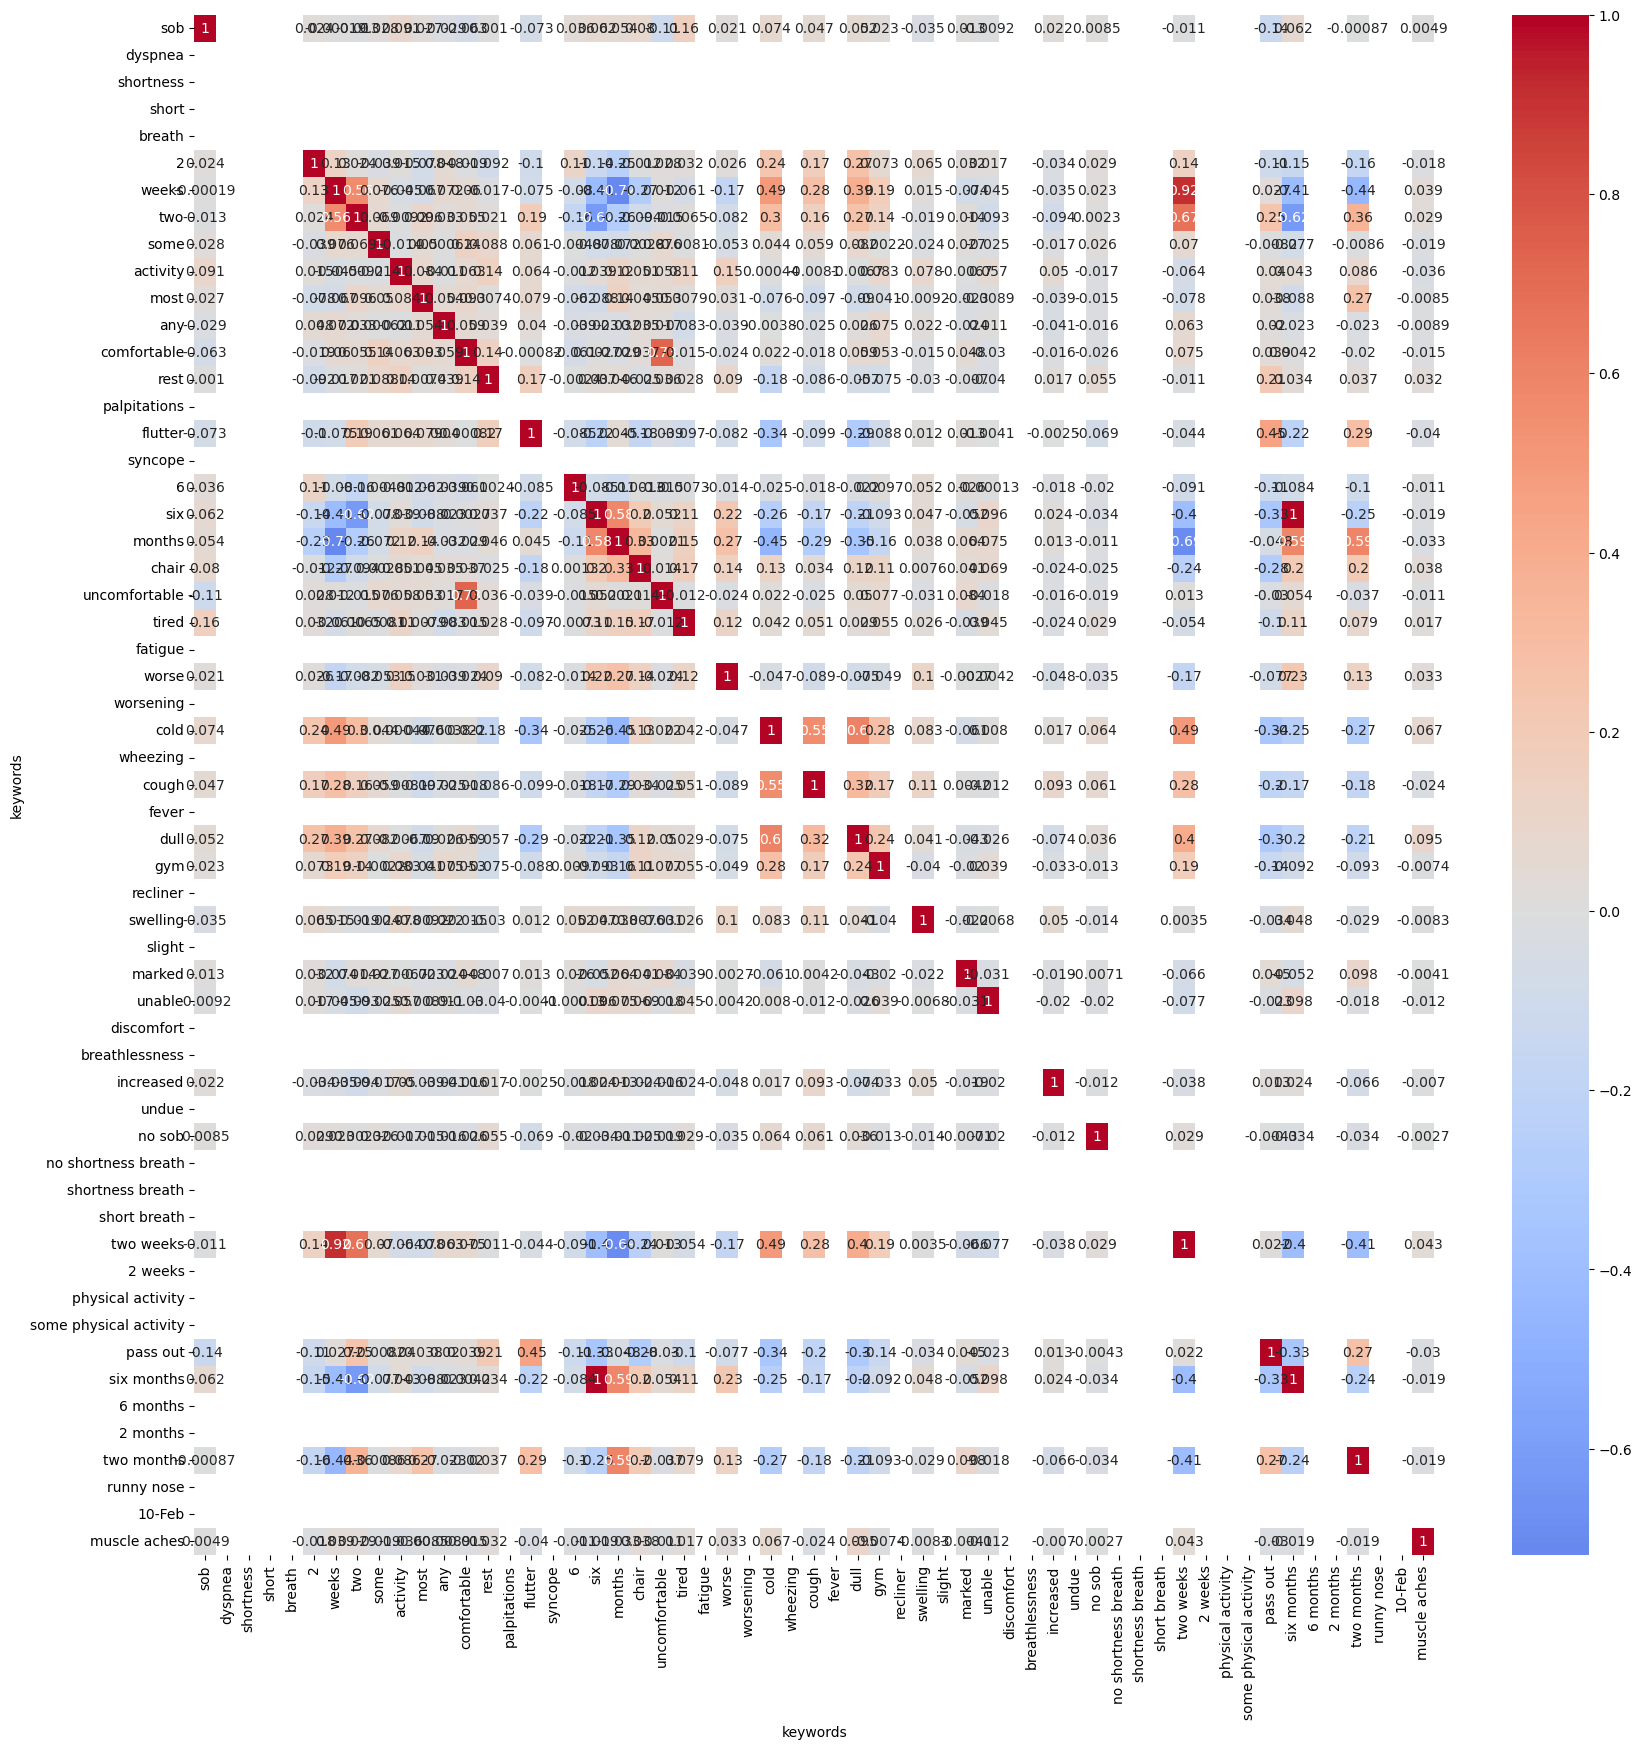

In [50]:
# add heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
#matrix=np.triu(corr)
#matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap="coolwarm",center=0,xticklabels=True, yticklabels=True, annot=True)

In [52]:
np.fill_diagonal(corr.values, np.nan)


In [53]:
corr

keywords,sob,dyspnea,shortness,short,breath,2,weeks,two,some,activity,...,physical activity,some physical activity,pass out,six months,6 months,2 months,two months,runny nose,10-Feb,muscle aches
keywords,,,,,,,,,,,,,,,,,,,,,
sob,NaN,NaN,NaN,NaN,NaN,0.023599,-0.000193,-0.013055,0.027765,0.090528,...,NaN,NaN,-0.139483,0.061704,NaN,NaN,-0.000872,NaN,NaN,0.004914
dyspnea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shortness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
short,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.023599,NaN,NaN,NaN,NaN,NaN,0.127555,0.024235,-0.038823,0.015281,...,NaN,NaN,-0.105174,-0.151843,NaN,NaN,-0.163437,NaN,NaN,-0.017844
weeks,-0.000193,NaN,NaN,NaN,NaN,0.127555,NaN,0.564288,0.075908,-0.044944,...,NaN,NaN,0.026790,-0.414813,NaN,NaN,-0.440686,NaN,NaN,0.039344
two,-0.013055,NaN,NaN,NaN,NaN,0.024235,0.564288,NaN,0.069039,-0.009199,...,NaN,NaN,0.252175,-0.623663,NaN,NaN,0.363532,NaN,NaN,0.028812
some,0.027765,NaN,NaN,NaN,NaN,-0.038823,0.075908,0.069039,NaN,-0.013856,...,NaN,NaN,-0.008224,-0.076567,NaN,NaN,-0.008595,NaN,NaN,-0.018806


In [54]:
order_top2 = np.argsort(-corr.values, axis=1)[:, :2]
order_bottom = np.argsort(corr.values, axis=1)[:, :1]

result_top2 = pd.DataFrame(
    corr.columns[order_top2], 
    columns=['1st', '2nd'],
    index=corr.index
)

result_bottom = pd.DataFrame(
    corr.columns[order_bottom], 
    columns=['Last'],
    index=corr.index
)

result = result_top2.join(result_bottom)

C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\4065019186.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  corr.columns[order_top2],
C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\4065019186.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  corr.columns[order_bottom],


In [55]:
result

,1st,2nd,Last
keywords,,,
sob,tired,activity,pass out
dyspnea,sob,dull,sob
shortness,sob,dull,sob
short,sob,dull,sob
breath,sob,dull,sob
2,dull,cold,months
weeks,two weeks,two,months
two,two weeks,weeks,six months
some,comfortable,rest,six


In [56]:
for x in result.columns:
    result[x+"_Val"] = corr.lookup(corr.index, result[x])


                                  1st            2nd        Last   1st_Val  \
keywords                                                                     
sob                             tired       activity    pass out  0.156874   
dyspnea                           sob           dull         sob       NaN   
shortness                         sob           dull         sob       NaN   
short                             sob           dull         sob       NaN   
breath                            sob           dull         sob       NaN   
2                                dull           cold      months  0.274963   
weeks                       two weeks            two      months  0.917123   
two                         two weeks          weeks  six months  0.671607   
some                      comfortable           rest         six  0.142513   
activity                        worse           rest   two weeks  0.152971   
most                       two months         months       cough

C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\2222222254.py:2: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  result[x+"_Val"] = corr.lookup(corr.index, result[x])
C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\2222222254.py:2: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  result[x+"_Val"] = corr.lookup(corr.index, result[x])
C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\2222222254.py:2: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  result[x+"_Val"] = corr.lookup(corr.index, result[x])


In [57]:
result

,1st,2nd,Last,1st_Val,2nd_Val,Last_Val
keywords,,,,,,
sob,tired,activity,pass out,0.156874,0.090528,-0.139483
dyspnea,sob,dull,sob,NaN,NaN,NaN
shortness,sob,dull,sob,NaN,NaN,NaN
short,sob,dull,sob,NaN,NaN,NaN
breath,sob,dull,sob,NaN,NaN,NaN
2,dull,cold,months,0.274963,0.238115,-0.247978
weeks,two weeks,two,months,0.917123,0.564288,-0.718486
two,two weeks,weeks,six months,0.671607,0.564288,-0.623663
some,comfortable,rest,six,0.142513,0.088300,-0.078195


In [60]:
result[['1st', '1st_Val', '2nd', '2nd_Val', 'Last', 'Last_Val']].sort_values('1st_Val', ascending=False)

,1st,1st_Val,2nd,2nd_Val,Last,Last_Val
keywords,,,,,,
six,six months,0.995132,months,0.583127,two,-0.618978
six months,six,0.995132,months,0.588114,two,-0.623663
weeks,two weeks,0.917123,two,0.564288,months,-0.718486
two weeks,weeks,0.917123,two,0.671607,months,-0.692605
comfortable,uncomfortable,0.727970,some,0.142513,sob,-0.062677
uncomfortable,comfortable,0.727970,marked,0.084489,sob,-0.108049
two,two weeks,0.671607,weeks,0.564288,six months,-0.623663
dull,cold,0.603801,two weeks,0.399708,months,-0.347306
cold,dull,0.603801,cough,0.550825,months,-0.450721


In [36]:
matrix

keywords,sob,dyspnea,shortness,short,breath,2,weeks,two,some,activity,...,physical activity,some physical activity,pass out,six months,6 months,2 months,two months,runny nose,10-Feb,muscle aches
keywords,,,,,,,,,,,,,,,,,,,,,
sob,1.000000,NaN,NaN,NaN,NaN,0.023599,-0.000193,-0.013055,0.027765,0.090528,...,NaN,NaN,-0.139483,0.061704,NaN,NaN,-0.000872,NaN,NaN,0.004914
dyspnea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shortness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
short,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.023599,NaN,NaN,NaN,NaN,1.000000,0.127555,0.024235,-0.038823,0.015281,...,NaN,NaN,-0.105174,-0.151843,NaN,NaN,-0.163437,NaN,NaN,-0.017844
weeks,-0.000193,NaN,NaN,NaN,NaN,0.127555,1.000000,0.564288,0.075908,-0.044944,...,NaN,NaN,0.026790,-0.414813,NaN,NaN,-0.440686,NaN,NaN,0.039344
two,-0.013055,NaN,NaN,NaN,NaN,0.024235,0.564288,1.000000,0.069039,-0.009199,...,NaN,NaN,0.252175,-0.623663,NaN,NaN,0.363532,NaN,NaN,0.028812
some,0.027765,NaN,NaN,NaN,NaN,-0.038823,0.075908,0.069039,1.000000,-0.013856,...,NaN,NaN,-0.008224,-0.076567,NaN,NaN,-0.008595,NaN,NaN,-0.018806


In [68]:
elimination = df.sum().sort_values()

In [81]:
elim_list = list(pd.DataFrame(elimination[elimination == 0].reset_index()).keywords)

In [88]:
new_df=df.drop(elim_list, axis=1)

In [89]:
new_df

keywords,sob,2,weeks,two,some,activity,most,any,comfortable,rest,...,swelling,marked,unable,increased,no sob,two weeks,pass out,six months,two months,muscle aches
0,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1294,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1295,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1296,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='keywords', ylabel='keywords'>

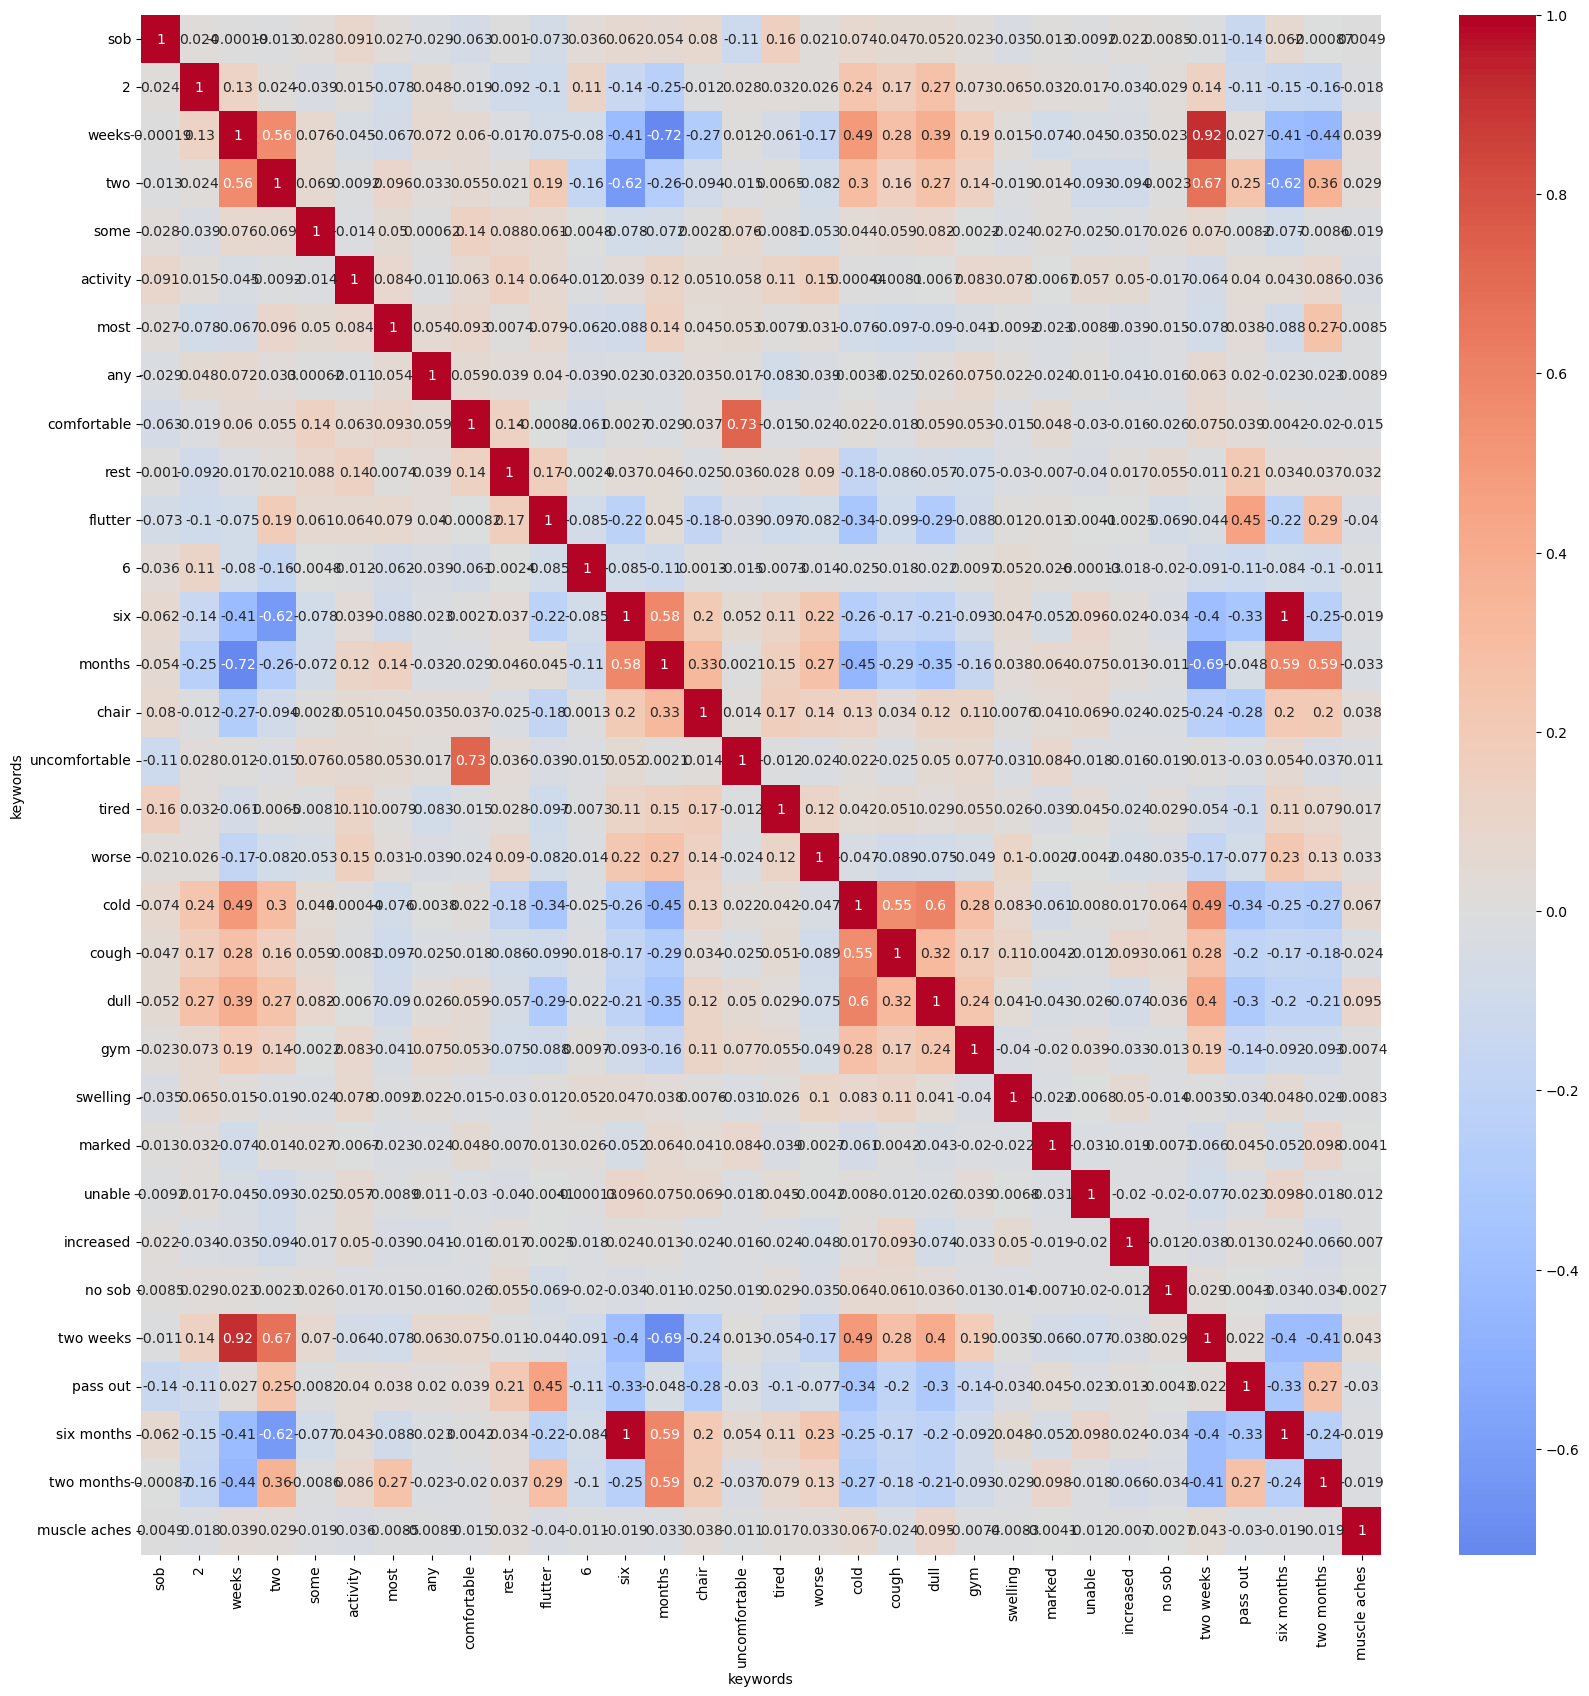

In [90]:
corr = new_df.corr()
#matrix=np.triu(corr)
#matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap="coolwarm",center=0,xticklabels=True, yticklabels=True, annot=True)

In [91]:
np.fill_diagonal(corr.values, np.nan)

In [92]:
order_top2 = np.argsort(-corr.values, axis=1)[:, :2]
order_bottom = np.argsort(corr.values, axis=1)[:, :1]

result_top2 = pd.DataFrame(
    corr.columns[order_top2], 
    columns=['1st', '2nd'],
    index=corr.index
)

result_bottom = pd.DataFrame(
    corr.columns[order_bottom], 
    columns=['Last'],
    index=corr.index
)

result = result_top2.join(result_bottom)

C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\4065019186.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  corr.columns[order_top2],
C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\4065019186.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  corr.columns[order_bottom],


In [93]:
result

,1st,2nd,Last
keywords,,,
sob,tired,activity,pass out
2,dull,cold,months
weeks,two weeks,two,months
two,two weeks,weeks,six months
some,comfortable,rest,six
activity,worse,rest,two weeks
most,two months,months,cough
any,gym,weeks,tired
comfortable,uncomfortable,some,sob


In [95]:
for x in result.columns:
    result[x+"_Val"] = corr.lookup(corr.index, result[x])
result[['1st', '1st_Val', '2nd', '2nd_Val', 'Last', 'Last_Val']].sort_values('1st_Val', ascending=False)

C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\610863439.py:2: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  result[x+"_Val"] = corr.lookup(corr.index, result[x])
C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\610863439.py:2: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  result[x+"_Val"] = corr.lookup(corr.index, result[x])
C:\Users\taylo\AppData\Local\Temp\ipykernel_31948\610863439.py:2: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  result[x+"_Val"] = corr.lookup(corr.index, result[x])


,1st,1st_Val,2nd,2nd_Val,Last,Last_Val
keywords,,,,,,
six,six months,0.995132,months,0.583127,two,-0.618978
six months,six,0.995132,months,0.588114,two,-0.623663
weeks,two weeks,0.917123,two,0.564288,months,-0.718486
two weeks,weeks,0.917123,two,0.671607,months,-0.692605
comfortable,uncomfortable,0.727970,some,0.142513,sob,-0.062677
uncomfortable,comfortable,0.727970,marked,0.084489,sob,-0.108049
two,two weeks,0.671607,weeks,0.564288,six months,-0.623663
dull,cold,0.603801,two weeks,0.399708,months,-0.347306
cold,dull,0.603801,cough,0.550825,months,-0.450721


In [188]:
#(a, b, c) = keyword(data['HPI'], key['keywords'])
#data['lexums key']=a
#data['percent lexums key']=b
#data['lexical density key']=c
#data

In [189]:
#(a, b, c) = keyword(data['HPI'], key['NYHA II Acute'])
#data['lexums NYHA II A']=a
#data['percent NYHA II A']=b
#data['lexical density NYHA A']=c
#data

In [190]:
#(a, b, c) = keyword(data['HPI'], key['NYHA II Fam'])
#data['lexums NYHA II F']=a
#data['percent lexums NYHA II F']=b
#data['lexical density NYHA II F']=c
#data

In [191]:
#(a, b, c) = keyword(data['HPI'], key['NYHA III'])
#data['lexums NYHA III']=a
#data['percent lexums NYHA III']=b
#data['lexical density NYHA III']=c
#data

In [192]:
#(a, b, c) = keyword(data['HPI'], key['NYHA IV'])
#data['lexums NYHA IV']=a
#data['percent lexums NYHA IV']=b
#data['lexical density NYHA IV']=c
#data

In [193]:
#data = data.sort_values("lexums key")
#data

In [194]:
#g=data.groupby(['NYHA Classification']).mean("lexums").reindex()

#g

In [195]:
#g=data.groupby(['Organization Unit']).mean("lexums").reindex()

#g

In [196]:
#g=data.groupby(['Organization Unit', "Case/Scenario Name"])["Case/Scenario Name"].count().reindex()

#g

In [197]:
#g=data.groupby(['Case/Scenario Name']).mean("lexums").reindex()
#g

In [100]:
result = pd.concat([mydata, new_df], axis=1)
result

,Organization Unit,ID,Case/Scenario Name,NYHA Classification,Assessment,Classification,HPI,correct words,correct words percent,wrong words,...,swelling,marked,unable,increased,no sob,two weeks,pass out,six months,two months,muscle aches
0,Auburn,Student.177,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1.0,0.0,pt states 3 days ago went family doctor sob fe...,7.0,25.925926,0.0,...,0,0,0,0,0,1,0,0,0,0
1,Auburn,Student.178,Acute Viral Myocarditis I51.4,NYHA II,1.0,0.0,patient presents cardiology office evaluation ...,10.0,28.571429,1.0,...,1,0,0,0,0,1,0,0,0,0
2,Auburn,Student.179,Acute Viral Myocarditis I51.4,NYHA II,1.0,1.0,cc patient presents sob chest pain peripheral ...,7.0,20.000000,0.0,...,0,0,0,0,0,1,0,0,0,0
3,Auburn,Student.180,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1.0,0.0,cc sob sob walk around hpi leslie palmer yo pr...,2.0,6.451613,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Auburn,Student.181,Acute Viral Myocarditis I51.4,NYHA II,1.0,1.0,cc patient sob sob tiredd hpi patient yo f nam...,9.0,25.714286,1.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
1296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,1,0


In [217]:
#result = result.sort_values('correct words percent')
#result

,Organization Unit,ID,Case/Scenario Name,NYHA Classification,Assessment,Classification,HPI,correct words,correct words percent,wrong words,...,physical activity,some physical activity,pass out,six months,6 months,2 months,two months,runny nose,10-Feb,muscle aches
167,Carolinas,Student.344,Acute Viral Myocarditis I51.4,NYHA II,1,1,cc sob chest pain hpi yo presents cardiology c...,1,2.857143,0,...,0,0,0,0,0,0,0,0,0,0
644,Virginia,Student.95,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,cc l palmer presented feel like going pass out...,1,3.703704,0,...,0,0,1,0,0,0,0,0,0,0
452,Monroe,Student.629,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1,0,yo pt presents sob weezing presyncopy really g...,2,6.451613,0,...,0,0,0,0,0,0,0,0,0,0
218,Carolinas,Student.395,Ischemic Cardiomyopathy I25.2,NYHA IV,1,1,patient palmer presents today sob fatigue pati...,2,6.896552,0,...,0,0,0,0,0,0,0,0,0,0
254,Carolinas,Student.431,Acute Viral Myocarditis I51.4,NYHA II,1,1,leslie palmer yo f presents sob fatigue past 5...,3,8.571429,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Monroe,Student.637,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1,1,cc short breath fatigued hpi yo f presents cli...,18,58.064516,0,...,1,0,1,0,0,1,0,0,0,0
61,Auburn,Student.238,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,cc fatigue sob hpi patient leslie palmer yo pr...,16,59.259259,4,...,0,0,1,0,0,0,0,0,0,0
475,Virginia,Student.100,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,yo presents cardiology office complaints sob f...,16,59.259259,1,...,1,1,1,0,0,0,0,0,0,0
534,Virginia,Student.154,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,6 10 22 cardiology clinic 8 00am nurse note pa...,17,62.962963,2,...,1,0,1,0,0,0,0,0,0,0


In [218]:
g=result.groupby(['Organization Unit', 'NYHA Classification']).mean("correct words").reindex()

g

Assessment  Classification  \
Organization Unit NYHA Classification                               
Auburn            NYHA II                0.988506        0.942529   
                  NYHA III               1.000000        0.904762   
                  NYHA IV                1.000000        0.967742   
Carolinas         NYHA II                1.000000        0.936709   
                  NYHA III               1.000000        0.842105   
                  NYHA IV                1.000000        0.878049   
Monroe            NYHA II                0.987342        0.848101   
                  NYHA III               1.000000        0.868421   
                  NYHA IV                1.000000        1.000000   
Virginia          NYHA II                1.000000        0.942529   
                  NYHA III               1.000000        0.866667   
                  NYHA IV                1.000000        0.977273   

                                       correct words  correct words percent  \
Organization Unit NYHA Classification                                         
Auburn            NYHA II                  10.609195              34.233412   
                  NYHA III                  9.666667              31.182796   
                  NYHA IV                  10.096774              34.816463   
Carolinas         NYHA II                   9.341772              30.173465   
                  NYHA III                  9.315789              30.050934   
                  NYHA IV                   9.000000              31.034483   
Monroe            NYHA II                   9.620253              30.861965   
                  NYHA III                  9.736842              31.409168   
                  NYHA IV                   8.315789              28.675136   
Virginia          NYHA II                   9.977011              32.320136   
                  NYHA III                 11.800000              38.064516   
                  NYHA IV                   9.931818              34.247649   

                                       wrong words  wrong words percent  \
Organization Unit NYHA Classification                                     
Auburn            NYHA II                 1.034483             4.130965   
                  NYHA III                0.857143             3.296703   
                  NYHA IV                 0.645161             2.304147   
Carolinas         NYHA II                 1.253165             4.990410   
                  NYHA III                0.736842             2.834008   
                  NYHA IV                 0.975610             3.484321   
Monroe            NYHA II                 0.949367             3.916379   
                  NYHA III                0.710526             2.732794   
                  NYHA IV                 0.605263             2.161654   
Virginia          NYHA II                 1.080460             4.479276   
                  NYHA III                0.622222             2.393162   
                  NYHA IV                 0.545455             1.948052   

                                       Keyword Sequence  
Organization Unit NYHA Classification                    
Auburn            NYHA II                         False  
                  NYHA III                        False  
                  NYHA IV                         False  
Carolinas         NYHA II                         False  
                  NYHA III                        False  
                  NYHA IV                         False  
Monroe            NYHA II                         False  
                  NYHA III                        False  
                  NYHA IV                         False  
Virginia          NYHA II                         False  
                  NYHA III                        False  
                  NYHA IV                         False

In [201]:
g=result.groupby(['Organization Unit', 'Case/Scenario Name',"Assessment", "Classification"]).mean("correct words").reindex()

g

correct words  \
Organization Unit Case/Scenario Name                     Assessment Classification                  
Auburn            Acute Viral Myocarditis I51.4          1          0                   12.000000   
                                                                    1                   11.043478   
                  Fam. Hypertrophic Cardiomyopathy I42.2 0          1                    9.000000   
                                                         1          0                    8.000000   
                                                                    1                   10.342857   
                  Ischemic Cardiomyopathy I25.2          1          0                    6.000000   
                                                                    1                   10.166667   
                  Sarcoidosis R. Cardiomyopathy I42.5    1          0                    9.000000   
                                                                    1                    9.736842   
Carolinas         Acute Viral Myocarditis I51.4          1          0                    8.666667   
                                                                    1                   10.459459   
                  Fam. Hypertrophic Cardiomyopathy I42.2 1          0                    8.500000   
                                                                    1                    8.324324   
                  Ischemic Cardiomyopathy I25.2          1          0                    7.800000   
                                                                    1                    9.138889   
                  Sarcoidosis R. Cardiomyopathy I42.5    1          0                    8.166667   
                                                                    1                    9.531250   
Monroe            Acute Viral Myocarditis I51.4          0          0                    5.000000   
                                                         1          0                   10.750000   
                                                                    1                   11.342857   
                  Fam. Hypertrophic Cardiomyopathy I42.2 1          0                    7.571429   
                                                                    1                    8.187500   
                  Ischemic Cardiomyopathy I25.2          1          1                    8.289474   
                  Sarcoidosis R. Cardiomyopathy I42.5    1          0                    9.000000   
                                                                    1                    9.848485   
Virginia          Acute Viral Myocarditis I51.4          1          0                    9.750000   
                                                                    1                   11.205128   
                  Fam. Hypertrophic Cardiomyopathy I42.2 1          0                    7.000000   
                                                                    1                    8.953488   
                  Ischemic Cardiomyopathy I25.2          1          0                    5.000000   
                                                                    1                   10.023256   
                  Sarcoidosis R. Cardiomyopathy I42.5    1          0                   11.000000   
                                                                    1                   11.923077   

                                                                                    correct words percent  \
Organization Unit Case/Scenario Name                     Assessment Classification                          
Auburn            Acute Viral Myocarditis I51.4          1          0                           34.285714   
                                                                    1                           31.552795   
                  Fam. Hypertrophic Cardiomyopathy I42.2 0          1                           33.333333   
   

In [101]:
writer = pd.ExcelWriter('Student Keyword Data V2.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
result.to_excel(writer, sheet_name='Data Sheet')

# Close the Pandas Excel writer and output the Excel file.
writer.save()